In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Importar o dataset
df = pd.read_csv('../data/dataset_problema2.csv')

In [3]:
# Separar features e target
X = df.drop(['id', 'Severidade'], axis=1)
y = df['Severidade']

In [4]:
# Separar dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Padronizar as variáveis
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [6]:
modelo_linear_1 = LinearRegression()

score = cross_val_score(modelo_linear_1, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8417215821032977


In [7]:
# Selecionar número de variáveis usando validação cruzada
modelo_linear = LinearRegression()
max_features = 20
lista_rmse = []

for num_features in range(1, max_features + 1):
    selector = RFE(modelo_linear, n_features_to_select=num_features, step=1)
    selector = selector.fit(X_train_sc, y_train)
    selected_features = X_train.columns[selector.support_]
    X_sel = X_train_sc[:, selector.support_]
    rmse_scores = np.abs(cross_val_score(modelo_linear, X_sel, y_train, cv=10, scoring='neg_root_mean_squared_error'))
    lista_rmse.append(np.mean(rmse_scores))
    print(f'Número de features: {num_features}, RMSE médio: {np.mean(rmse_scores)}')

Número de features: 1, RMSE médio: 22.999512866756277
Número de features: 2, RMSE médio: 20.978943999476847
Número de features: 3, RMSE médio: 12.21339621150204
Número de features: 4, RMSE médio: 11.313324687697616
Número de features: 5, RMSE médio: 8.638765107371446
Número de features: 6, RMSE médio: 8.67306852752786


Número de features: 7, RMSE médio: 8.758615941203555
Número de features: 8, RMSE médio: 8.882267359106862
Número de features: 9, RMSE médio: 7.610800020400892
Número de features: 10, RMSE médio: 7.501372965788542
Número de features: 11, RMSE médio: 7.698979572991989
Número de features: 12, RMSE médio: 7.651101456140379
Número de features: 13, RMSE médio: 7.655357291875004
Número de features: 14, RMSE médio: 7.7867650540273985
Número de features: 15, RMSE médio: 7.86509187588724
Número de features: 16, RMSE médio: 7.954618243200673
Número de features: 17, RMSE médio: 8.051802922438437
Número de features: 18, RMSE médio: 8.087998611981893
Número de features: 19, RMSE médio: 8.197654755112248
Número de features: 20, RMSE médio: 8.252242790516224


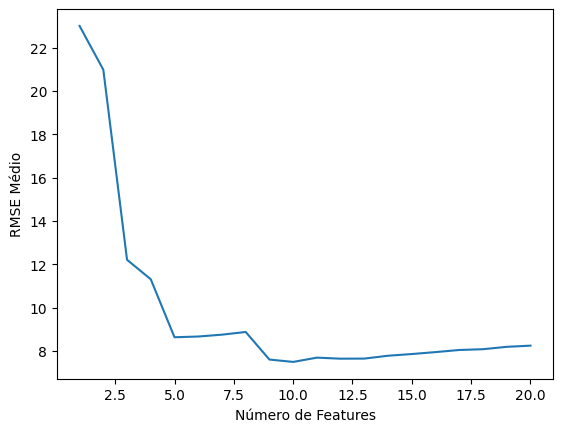

In [8]:
# Gráfico
plt.plot(range(1, max_features + 1), lista_rmse)
plt.xlabel('Número de Features')
plt.ylabel('RMSE Médio')
plt.show()

In [9]:
# Selecionar features com melhor desempenho
num_features = 10
selector = RFE(modelo_linear, n_features_to_select=num_features, step=1)
selector = selector.fit(X_train_sc, y_train)
selected_features = X_train.columns[selector.support_]

In [10]:
# Avaliação do modelo
X_train_sel = X_train_sc[:, selector.support_]
modelo_linear.fit(X_train_sel, y_train)
y_pred = modelo_linear.predict(X_test_sc[:, selector.support_])

In [11]:
# Métricas de avaliação
r2 = modelo_linear.score(X_test_sc[:, selector.support_], y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [12]:
print(f'R2: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


R2: 0.887634277870405
RMSE: 7.539476072278346
MAE: 6.344066348950323


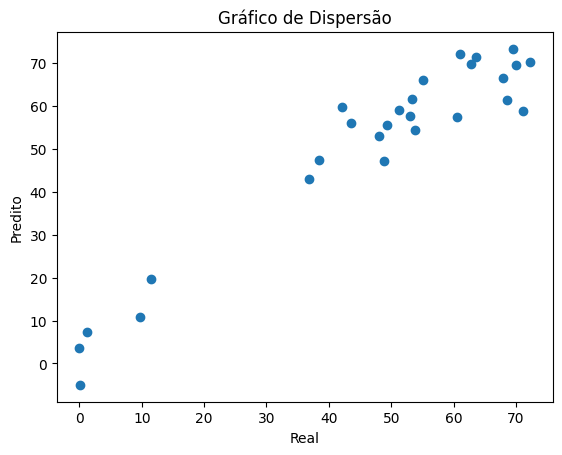

In [13]:
# Gráfico de dispersão
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Gráfico de Dispersão')
plt.show()